In [1]:
from PIL import Image
im = Image.open("./sprites/roguelike.png")

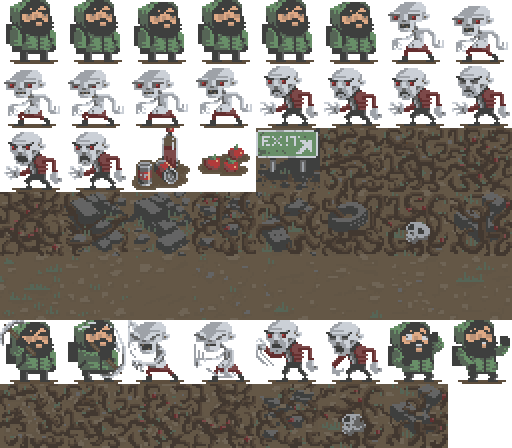

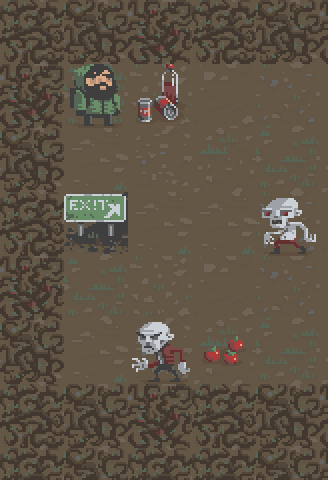

In [7]:
from typing import Tuple
import time

display(im)

SPRITE_SIDE = 64
SPRITES_IN_LINE = im.size[0] // SPRITE_SIDE


scene = Image.new("RGBA", (328, 480), (0,0,0,255))

sprites = []

for i in range(56):
    x1 = SPRITE_SIDE * i % im.size[0]
    y1 = (i // SPRITES_IN_LINE) * SPRITE_SIDE

    part = im.crop((x1, y1, x1 + SPRITE_SIDE, y1 + SPRITE_SIDE))
    sprites.append(part)



def add_to_scene(sprite: Image, position: Tuple[int, int], mask=None):
    scene.paste(sprite, (position[0] * SPRITE_SIDE, position[1] * SPRITE_SIDE), mask)

def add_obj_to_scene(sprite: Image, position: Tuple[int, int]):
    scene.alpha_composite(sprite, (position[0] * SPRITE_SIDE, position[1] * SPRITE_SIDE), )


scene_desc = {
    "background": [
        21, 22, 23, 21, 22, 23,
        23, 32, 33, 34, 35, 36,
        22, 37, 38, 39, 32, 39,
        21, 38, 37, 37, 35, 34,
        23, 32, 33, 34, 35, 36,
        22, 37, 38, 39, 32, 39,
        21, 22, 23, 21, 22, 23,
        21, 22, 21, 21, 22, 23,
    ],
    # sprite_id, pos_x, pos_y
    "objects": [
        [0, 1, 1],
        [7, 4, 3],
        [15, 2, 5],
        [18, 2, 1],
        [19, 3, 5],
        [20, 1, 3],
    ]
}

def render_scene(scene_desc):
    for (i, sprite_num) in enumerate(scene_desc["background"]):
        add_to_scene(sprites[sprite_num], (i % 6, i // 6))

    for sprite_id, x, y in scene_desc["objects"]:
        add_to_scene(sprites[sprite_id], (x, y), sprites[sprite_id])


render_scene(scene_desc)

display(scene)

{'one': '1', 'two': '2', 'three': '3'}